# Prédiction des prix de l'immobilier à Boston dans les années 1970

La prédiction du prix de maisons bostoniennes des années 1970, dont les données sont issues de la base *Boston House Prices*, créée par D. Harrison et D.L. Rubinfeld à l'Université de Californie à Irvine (http://archive.ics.uci.edu/ml/machine-learning-databases/housing/), est un problème classique d'apprentissage supervisé.

<img src="https://1.bp.blogspot.com/-sCZIatDf9LQ/XGm-lEHXnAI/AAAAAAAAPxQ/kv8S8fdgudAwWTFuJhuAoiykLmWLCoOtgCLcBGAs/s1600/197010xx-GovernmentCenter-Boston_resize.JPG" width=600 />

Plus précisément, le label à prédire dans cette base de données est le prix médian par quartier de l'immobilier (en milliers de dollars). Il s'agit donc d'un problème de régression puisque l'on veut inférer des valeurs continues. Pour ce faire, on dispose de 13 entrées offrant les informations suivantes :

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- TAX - full-value property-tax rate per \$10,000
- RAD - index of accessibility to radial highways
- PTRATIO - pupil-teacher ratio by town
- B $ = 1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - percentage lower status of the population

L'objectif de ce TP est d'arriver à prédire au plus près les valeurs médianes de prix de maison par quartier.


![Texte alternatif…](https://miro.medium.com/max/763/1*i9vZk7NkS1dZz6JEcbV5nA.png)

In [1]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers

%matplotlib inline

2024-09-04 17:03:03.867851: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-04 17:03:03.870668: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 17:03:03.915802: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 17:03:03.915849: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 17:03:03.915880: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

##### _**Exercice** : Définir une fonction d'affichage `plot_loss` qui permet d'afficher erreur d'entraînement et de validation._

On pourra tracer les courbes associées aux erreurs d'entraînement/de validation par epoch. 

In [2]:
def plot_loss(val_loss, train_loss, ymax=100):
    plt.plot(val_loss, color='green', label='Erreur de validation')
    plt.plot(train_loss, color='blue', linestyle='--', label='Erreur d\'entraînement')
    plt.xlabel('Epochs')
    plt.ylim(0, ymax)
    plt.title('Évolution de la perte sur les ensembles d\'apprentissage et de validation au cours de l\'apprentissage')
    plt.legend()

In [3]:
# %load solutions/plot_loss.py

## Préparation des données

On commence par charger les données d'entraînement et de test.

In [4]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Input

from sklearn.model_selection import train_test_split

In [5]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

## Approche simple à corriger

Nous allons commencer par créer un perceptron multicouche élementaire.

### Création du modèle

La fonction `Sequential` permet d'instancier un réseau de neuronnes, la fonction `add` permet d'ajouter une couche au réseau, enfin la fonction `Dense` correspond à un perceptron (monocouche).

In [6]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2024-09-04 17:03:06.102019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-04 17:03:06.102746: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Entrainement du réseau

La fonction `compile` permet de passer les arguments nécessaires à l'entraînement du réseau. `history` stocke les calculs de la loss pour chacune des epochs.

In [7]:
optim = optimizers.SGD(lr = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3951
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3951
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 11/50
13/13 [====================

### Evaluation du modèle

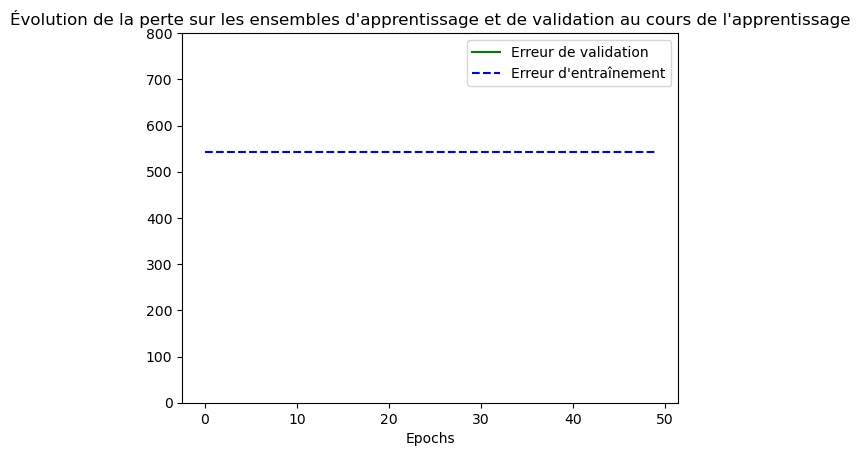

In [8]:
train_loss=(history.history['loss'])
plot_loss([], train_loss, ymax=800)

In [9]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 570.7010 - mae: 22.0784


[570.7009887695312, 22.078432083129883]

On obtient une mae d'environ 22, ce qui signie que l'on est éloigné en moyenne de 22000$ de la vérité terrain.

## Travail à faire

L'approche présentée ci-dessus apporte des résultats décevants, en raison de  quelques maladresses, voire erreurs. Dans un premier temps, vous devez **trouver et corriger ces problèmes**.

Dans un second temps, cherchez à améliorer les performances du modèle. Vous pouvez atteindre sans trop de difficulté un score de MAE inférieur à 3 sur l'ensemble de test. A chaque nouveau test, vous devez évaluer si votre réseau est en sous-apprentissage, ou en sur-apprentissage, et en déduire des modifications possibles pour en améliorer les performances.

MAE de test à battre si vous aimez les défis : **2.20** !

### Correction du modèle précédent

Vous penserez à évaluer votre modèle à l'aide de la fonction `plot_loss` définie précédement et de la fonction `evaluate`.

Epoch 1/50
12/12 [==============================] - 1s 15ms/step - loss: 2473.0588 - mae: 40.5758 - val_loss: 1346.4718 - val_mae: 29.7248
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 678.5389 - mae: 22.0138 - val_loss: 431.4256 - val_mae: 16.9848
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 340.9079 - mae: 13.9140 - val_loss: 375.5973 - val_mae: 13.1206
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 225.1170 - mae: 12.1376 - val_loss: 296.0760 - val_mae: 11.5969
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 180.8918 - mae: 9.6169 - val_loss: 256.5975 - val_mae: 11.9077
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 147.9401 - mae: 9.1394 - val_loss: 249.6976 - val_mae: 10.6981
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 128.3272 - mae: 8.3797 - val_loss: 217.5288 - val_mae: 10.9611
Epoch 8/50
12/12 [==============================

[34.597900390625, 4.120389938354492]

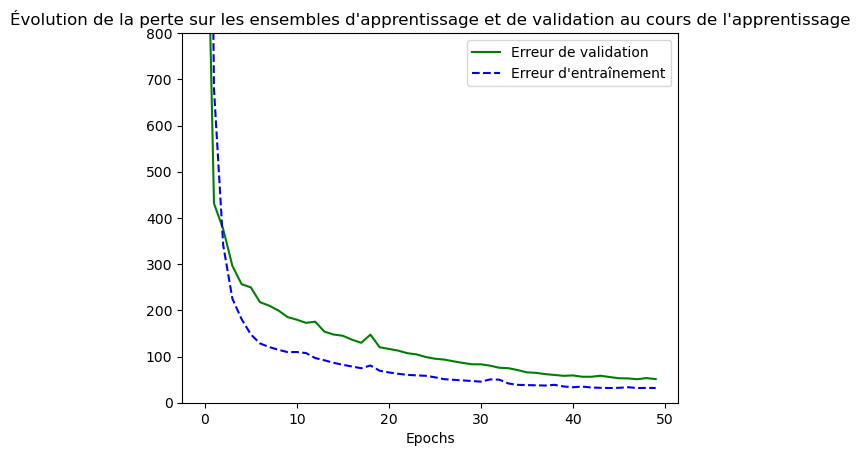

In [10]:
## A COMPLETER ##

# Création des données d'entrainement et de test
(x, y), (x_test, y_test) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1/10, random_state=2)

# Création du modèle
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=13))
model.add(Dense(1, activation='linear'))


# Entrainement du réseau
optim = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=32)


# Evaluation du modèle
train_loss=(history.history['loss'])
val_loss=(history.history['val_loss'])
plot_loss(val_loss, train_loss, ymax=800)

model.evaluate(x_test, y_test)

In [11]:
# %load solutions/correction.py

In [12]:
# %load solutions/evaluation.py

### Perceptron monocouche

Obtient-on des résultats comparables au réseau précédent avec un perceptron monocouche ?

In [13]:
## A COMPLETER ##

model = Sequential()
model.add(Dense(1, activation='linear', input_dim=13))

optim = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=16)

Epoch 1/100
23/23 [==============================] - 0s 7ms/step - loss: 7880.3472 - mae: 63.5861 - val_loss: 4870.5181 - val_mae: 61.4293
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 2854.1804 - mae: 44.0398 - val_loss: 2579.4880 - val_mae: 41.0306
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1294.7152 - mae: 27.4217 - val_loss: 1257.6246 - val_mae: 28.9000
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 626.3011 - mae: 19.3756 - val_loss: 646.1338 - val_mae: 20.8214
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 338.0307 - mae: 14.5298 - val_loss: 387.7828 - val_mae: 16.6377
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 229.3640 - mae: 12.2937 - val_loss: 262.0879 - val_mae: 13.9355
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 171.9505 - mae: 10.7730 - val_loss: 199.6034 - val_mae: 12.0822
Epoch 8/100
23/23 [================

In [14]:
# %load solutions/monocouche.py

4/4 [==============================] - 0s 2ms/step - loss: 35.9240 - mae: 4.2762


[35.92403030395508, 4.276233196258545]

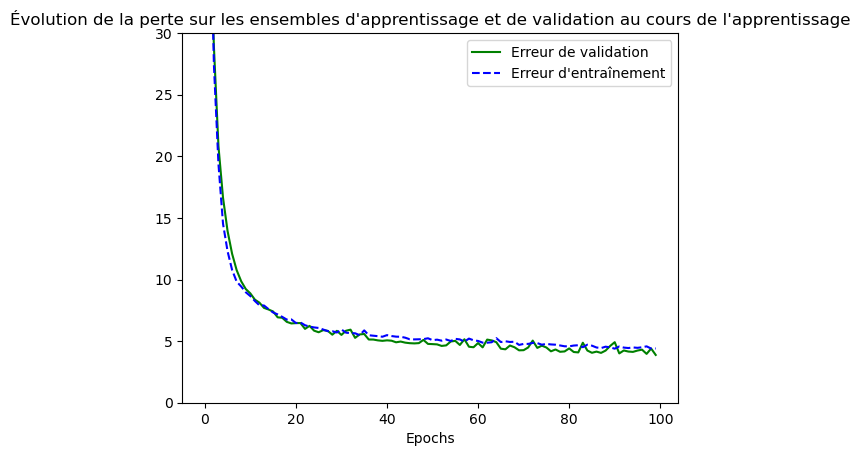

In [15]:
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)

### Améliorations possibles

Avant de regarder les solutions proposées, prenez **vraiment** le temps de tester des architectures.

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 3354.6113 - mae: 30.3228 - val_loss: 90.5858 - val_mae: 6.2083
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 78.7491 - mae: 6.6105 - val_loss: 93.7915 - val_mae: 7.9088
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 62.5947 - mae: 5.5918 - val_loss: 95.0777 - val_mae: 7.3690
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 67.4284 - mae: 5.8813 - val_loss: 107.7841 - val_mae: 5.9866
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 68.9199 - mae: 5.9399 - val_loss: 92.4247 - val_mae: 7.0018
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 59.1368 - mae: 5.4753 - val_loss: 94.6839 - val_mae: 8.3090
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 66.8143 - mae: 5.9938 - val_loss: 79.4824 - val_mae: 5.8001
Epoch 8/100
12/12 [==============================] - 0s 6ms/step

[30.14137840270996, 3.753795623779297]

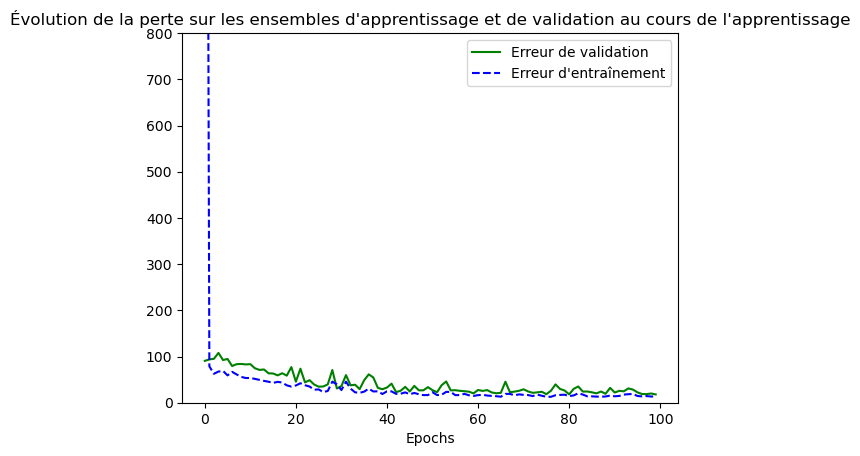

In [16]:
# Création des données d'entrainement et de test
(x, y), (x_test, y_test) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1/10, random_state=2)

# Création du modèle
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))


# Entrainement du réseau
optim = optimizers.Adam(learning_rate = 1e-2)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)


# Evaluation du modèle
train_loss=(history.history['loss'])
val_loss=(history.history['val_loss'])
plot_loss(val_loss, train_loss, ymax=800)

model.evaluate(x_test, y_test)

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 213.5666 - mae: 11.5928 - val_loss: 45.5061 - val_mae: 5.0115
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 57.9019 - mae: 5.7498 - val_loss: 52.8926 - val_mae: 5.0531
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 42.7912 - mae: 5.0455 - val_loss: 36.6381 - val_mae: 3.9700
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 30.7755 - mae: 4.2297 - val_loss: 39.0139 - val_mae: 3.8347
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 29.6267 - mae: 4.0047 - val_loss: 46.1649 - val_mae: 4.5064
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 23.3960 - mae: 3.6595 - val_loss: 29.2649 - val_mae: 3.6653
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 20.8434 - mae: 3.3444 - val_loss: 35.1976 - val_mae: 3.7839
Epoch 8/100
12/12 [==============================] - 0s 9ms/step -

[19.14690399169922, 3.058624267578125]

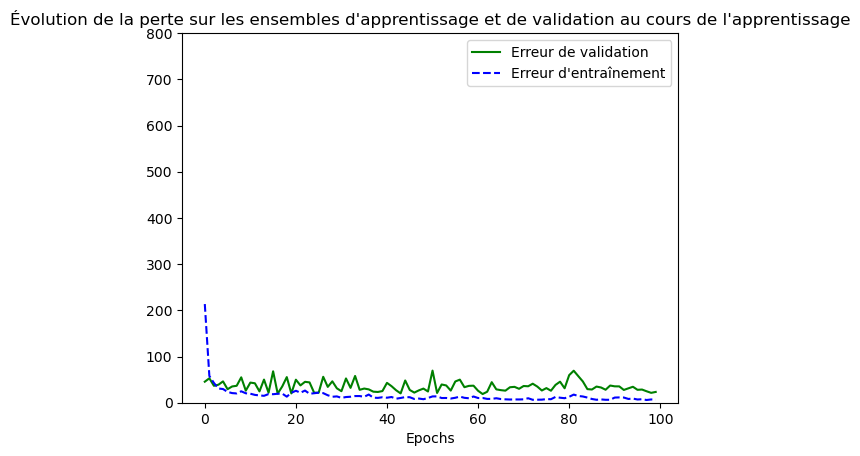

In [17]:
# Création des données d'entrainement et de test
(x, y), (x_test, y_test) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1/10, random_state=2)

# Normalisation des entrées
x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)

x_train = (x_train-x_mean)/x_std
x_val = (x_val-x_mean)/x_std
x_test = (x_test-x_mean)/x_std

# Création du modèle
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))


# Entrainement du réseau
optim = optimizers.Adam(learning_rate = 1e-2)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)


# Evaluation du modèle
train_loss=(history.history['loss'])
val_loss=(history.history['val_loss'])
plot_loss(val_loss, train_loss, ymax=800)

model.evaluate(x_test, y_test)

## Propositions d'améliorations

On peut certainement trouver de meilleures architectures !

### Amélioration n°1

In [18]:
# %load solutions/amelioration_1.py

4/4 [==============================] - 0s 3ms/step - loss: 19.1469 - mae: 3.0586


[19.14690399169922, 3.058624267578125]

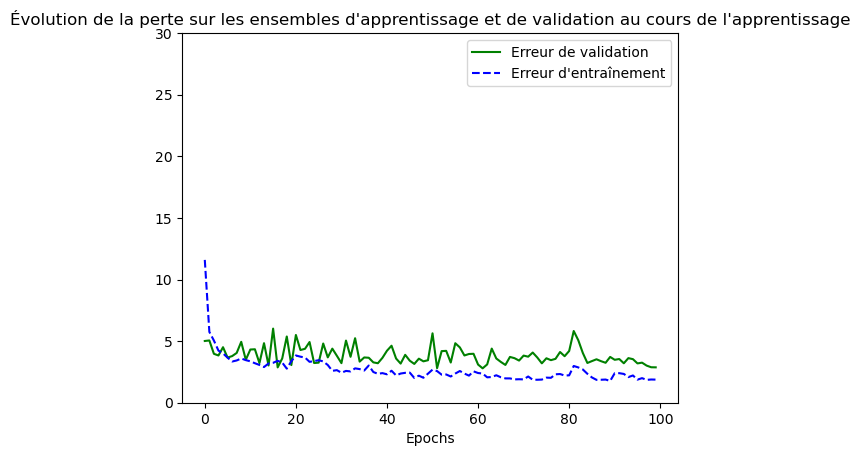

In [19]:
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)

### Amélioration n°2

In [20]:
# %load solutions/amelioration_2.py

4/4 [==============================] - 0s 2ms/step - loss: 19.1469 - mae: 3.0586


[19.14690399169922, 3.058624267578125]

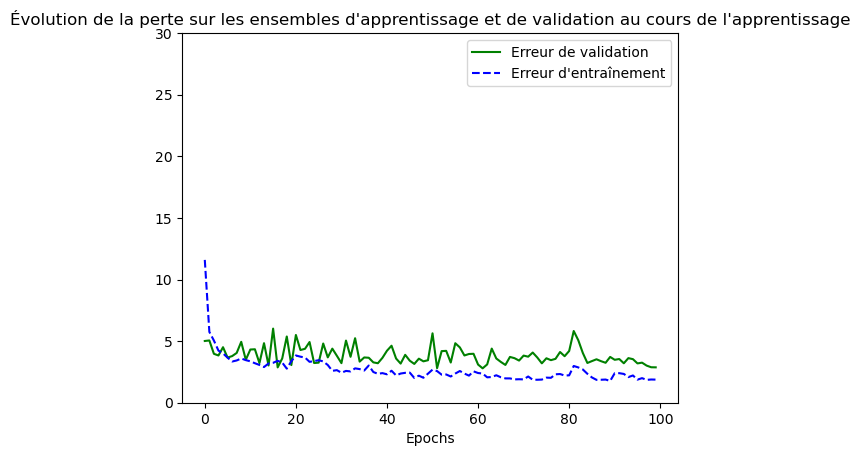

In [21]:
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)